In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Downloads\Project1\labelled_testing_data.csv")


In [3]:
dataset.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,129.050634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,129.051238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,129.051434,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,security_file_open,"[140362867191588, 8103505641674583858]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
3,129.051481,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,openat,[],4,17,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
4,129.051522,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,fstat,[140362867189385],2,0,"[{'name': 'fd', 'type': 'int', 'value': 17}, {...",0,0


In [4]:
dataset.shape

(188967, 16)

In [5]:
ds1 = dataset.dropna()
print(ds1)

         timestamp  processId  threadId  parentProcessId  userId  \
0       129.050634        382       382                1     101   
1       129.051238        379       379                1     100   
2       129.051434          1         1                0       0   
3       129.051481          1         1                0       0   
4       129.051522          1         1                0       0   
...            ...        ...       ...              ...     ...   
188962  496.629003       7555      7555             7548    1001   
188963  496.629025       7555      7555             7548    1001   
188964  496.629047       7555      7555             7548    1001   
188965  496.629069       7555      7555             7548    1001   
188966  496.629091       7555      7555             7548    1001   

        mountNamespace      processName         hostName  eventId  \
0           4026532232  systemd-resolve  ip-10-100-1-217       41   
1           4026532231  systemd-network  ip-1

In [6]:
ds1.shape

(188967, 16)

In [7]:
ds2 = dataset.ffill()
print(ds2)

         timestamp  processId  threadId  parentProcessId  userId  \
0       129.050634        382       382                1     101   
1       129.051238        379       379                1     100   
2       129.051434          1         1                0       0   
3       129.051481          1         1                0       0   
4       129.051522          1         1                0       0   
...            ...        ...       ...              ...     ...   
188962  496.629003       7555      7555             7548    1001   
188963  496.629025       7555      7555             7548    1001   
188964  496.629047       7555      7555             7548    1001   
188965  496.629069       7555      7555             7548    1001   
188966  496.629091       7555      7555             7548    1001   

        mountNamespace      processName         hostName  eventId  \
0           4026532232  systemd-resolve  ip-10-100-1-217       41   
1           4026532231  systemd-network  ip-1

In [8]:
ds2 = dataset.ffill()
print(ds2)

         timestamp  processId  threadId  parentProcessId  userId  \
0       129.050634        382       382                1     101   
1       129.051238        379       379                1     100   
2       129.051434          1         1                0       0   
3       129.051481          1         1                0       0   
4       129.051522          1         1                0       0   
...            ...        ...       ...              ...     ...   
188962  496.629003       7555      7555             7548    1001   
188963  496.629025       7555      7555             7548    1001   
188964  496.629047       7555      7555             7548    1001   
188965  496.629069       7555      7555             7548    1001   
188966  496.629091       7555      7555             7548    1001   

        mountNamespace      processName         hostName  eventId  \
0           4026532232  systemd-resolve  ip-10-100-1-217       41   
1           4026532231  systemd-network  ip-1

In [9]:
ds2.shape

(188967, 16)

In [10]:
ds2.columns

Index(['timestamp', 'processId', 'threadId', 'parentProcessId', 'userId',
       'mountNamespace', 'processName', 'hostName', 'eventId', 'eventName',
       'stackAddresses', 'argsNum', 'returnValue', 'args', 'sus', 'evil'],
      dtype='object')

In [11]:
x = ds1.iloc[:, [0,1]].values
y = ds1.iloc[:,2].values

print(x)
print(y)

[[1.29050634e+02 3.82000000e+02]
 [1.29051238e+02 3.79000000e+02]
 [1.29051434e+02 1.00000000e+00]
 ...
 [4.96629047e+02 7.55500000e+03]
 [4.96629069e+02 7.55500000e+03]
 [4.96629091e+02 7.55500000e+03]]
[ 382  379    1 ... 7555 7555 7555]


In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()
y_temp = y
# Assuming y_temp is your target variable to be encoded
y_temp = le.fit_transform(y_temp)

print("Actual Values:", y)
print("Transformed Values:", y_temp)

Actual Values: [ 382  379    1 ... 7555 7555 7555]
Transformed Values: [  7   6   0 ... 206 206 206]


In [13]:
y = y_temp
print(y)

[  7   6   0 ... 206 206 206]


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)


In [15]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (141725, 2)
x_test shape: (47242, 2)
y_train shape: (141725,)
y_test shape: (47242,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

model3 = SVC()
model4 = KNeighborsClassifier(n_neighbors = 7 , metric = 'euclidean')


In [17]:
model1.fit(x_train,y_train)
print ("Logistic Regression model is built !")

Logistic Regression model is built !


C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
model2.fit(x_train,y_train)

print ("Decision Tree Classifier model is built !")

Decision Tree Classifier model is built !


In [19]:
model3.fit(x_train,y_train)

print ("SVC model is built !")

SVC model is built !


In [20]:
model4.fit(x, y)
print ("KNN model is built !")

KNN model is built !


In [21]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x)

In [22]:
print ("Actual values of the testing data:",y_test)
print ("Prediction by LR:",y_pred1)
print ("Prediction by DTC:",y_pred2)
print ("Prediction by SVC:",y_pred3)

print ("Actual values of y:",y)
print ("Prediction by KNN:",y_pred4)

Actual values of the testing data: [206 206 206 ... 206 206  36]
Prediction by LR: [206 206 206 ... 206 206  70]
Prediction by DTC: [206 206 206 ... 206 206  36]
Prediction by SVC: [206 206 206 ... 206 206  36]
Actual values of y: [  7   6   0 ... 206 206 206]
Prediction by KNN: [  7   7   0 ... 206 206 206]


In [23]:
from sklearn.metrics import confusion_matrix
cm_LogisticRegression = confusion_matrix(y_test, y_pred1)
cm_DecisionTreeClassifier = confusion_matrix(y_test, y_pred2)
cm_SVC = confusion_matrix(y_test, y_pred3)
cm_KNN = confusion_matrix(y, y_pred4)

In [24]:
print("Confusion Matrix for Logistic Regression:\n", cm_LogisticRegression)
print("Confusion Matrix for Decision Tree Classifier:\n", cm_DecisionTreeClassifier)
print("Confusion Matrix for SVC:\n", cm_SVC)
print("Confusion Matrix for KNeighbors Classifier:\n", cm_KNN)

Confusion Matrix for Logistic Regression:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Confusion Matrix for Decision Tree Classifier:
 [[512   0   0 ...   0   0   0]
 [  0 355   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Confusion Matrix for SVC:
 [[512   0   0 ...   0   0   0]
 [  0 355   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Confusion Matrix for KNeighbors Classifier:
 [[2070    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [25]:
from sklearn.metrics import accuracy_score

log_acc = accuracy_score(y_pred1, y_test)
dt_acc = accuracy_score(y_pred2, y_test)
svm_acc = accuracy_score(y_pred3, y_test)
knn_acc = accuracy_score(y_pred4, y)

print ("Accuracy of Logistic Regression Model in %:",log_acc*100)
print ("Accuracy of Decision Tree Model in %:",dt_acc*100)
print ("Accuracy of Support Vector Machine Model in %:",svm_acc*100)
print ("Accuracy of KNN Model in %:",knn_acc*100)

Accuracy of Logistic Regression Model in %: 78.82181110029211
Accuracy of Decision Tree Model in %: 99.90897929808222
Accuracy of Support Vector Machine Model in %: 84.47779518225308
Accuracy of KNN Model in %: 99.89680737906619


In [26]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred1))
print(metrics.classification_report(y_test, y_pred2))
print(metrics.classification_report(y_test, y_pred3))
print(metrics.classification_report(y, y_pred4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       512
           3       0.00      0.00      0.00       355
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        29
          10       0.00      0.00      0.00        57
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        56
          15       0.00      0.00      0.00        16
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00        10
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00        10
          23       0.00    

C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       512
           3       1.00      1.00      1.00       355
           4       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        57
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        56
          15       0.94      1.00      0.97        16
          16       0.00      0.00      0.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00        10
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00        10
          23       0.00    

C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2070
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00      1392
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.67      0.40      0.50        10
           7       0.92      0.98      0.95        82
           8       0.92      1.00      0.96        36
           9       1.00      0.99      0.99        84
          10       1.00      0.98      0.99       239
          11       0.96      1.00      0.98        53
          12       1.00      1.00      1.00        37
          13       1.00      1.00      1.00       248
          14       0.00      0.00      0.00         1
          15       0.88      1.00      0.93        42
          16       0.00      0.00      0.00         2
          17       1.00    

C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AORUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
estimators = []
model11 = LogisticRegression()
estimators.append(('logistic1',model11))

model12 = LogisticRegression()
estimators.append(('logistic2',model12))

model13 = LogisticRegression()
estimators.append(('logistic3',model13))

model14 = LogisticRegression()
estimators.append(('logistic4',model14))

model15 = LogisticRegression()
estimators.append(('logistic5',model15))
estimators

[('logistic1', LogisticRegression()),
 ('logistic2', LogisticRegression()),
 ('logistic3', LogisticRegression()),
 ('logistic4', LogisticRegression()),
 ('logistic5', LogisticRegression())]

In [28]:
model16 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart1',model16))

model17 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart2',model17))

model18 = DecisionTreeClassifier(max_depth = 6)
estimators.append(('cart3',model18))

model19 = DecisionTreeClassifier(max_depth = 7)
estimators.append(('cart4',model19))

model20 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart5',model20))

estimators

[('logistic1', LogisticRegression()),
 ('logistic2', LogisticRegression()),
 ('logistic3', LogisticRegression()),
 ('logistic4', LogisticRegression()),
 ('logistic5', LogisticRegression()),
 ('cart1', DecisionTreeClassifier(max_depth=4)),
 ('cart2', DecisionTreeClassifier(max_depth=3)),
 ('cart3', DecisionTreeClassifier(max_depth=6)),
 ('cart4', DecisionTreeClassifier(max_depth=7)),
 ('cart5', DecisionTreeClassifier(max_depth=2))]

In [29]:
model21 = SVC(kernel = 'linear')
estimators.append(('svm1',model21))

model22 = SVC(kernel = 'poly')
estimators.append(('svm2',model22))

model23 = SVC(kernel = 'rbf')
estimators.append(('svm3',model23))

model24 = SVC(kernel = 'rbf')
estimators.append(('svm4',model24))

model25 = SVC(kernel = 'linear')
estimators.append(('svm5',model25))

estimators

[('logistic1', LogisticRegression()),
 ('logistic2', LogisticRegression()),
 ('logistic3', LogisticRegression()),
 ('logistic4', LogisticRegression()),
 ('logistic5', LogisticRegression()),
 ('cart1', DecisionTreeClassifier(max_depth=4)),
 ('cart2', DecisionTreeClassifier(max_depth=3)),
 ('cart3', DecisionTreeClassifier(max_depth=6)),
 ('cart4', DecisionTreeClassifier(max_depth=7)),
 ('cart5', DecisionTreeClassifier(max_depth=2)),
 ('svm1', SVC(kernel='linear')),
 ('svm2', SVC(kernel='poly')),
 ('svm3', SVC()),
 ('svm4', SVC()),
 ('svm5', SVC(kernel='linear'))]

In [30]:
model26 = KNeighborsClassifier(n_neighbors = 3 , metric = 'euclidean')
estimators.append(('knn1',model26))

model27 = KNeighborsClassifier(n_neighbors = 5 , metric = 'euclidean')
estimators.append(('knn2',model27))

model28 = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean')
estimators.append(('knn3',model28))

model29 = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
estimators.append(('knn4',model29))

model30 = KNeighborsClassifier(n_neighbors = 7 , metric = 'euclidean')
estimators.append(('knn5',model30))

estimators

[('logistic1', LogisticRegression()),
 ('logistic2', LogisticRegression()),
 ('logistic3', LogisticRegression()),
 ('logistic4', LogisticRegression()),
 ('logistic5', LogisticRegression()),
 ('cart1', DecisionTreeClassifier(max_depth=4)),
 ('cart2', DecisionTreeClassifier(max_depth=3)),
 ('cart3', DecisionTreeClassifier(max_depth=6)),
 ('cart4', DecisionTreeClassifier(max_depth=7)),
 ('cart5', DecisionTreeClassifier(max_depth=2)),
 ('svm1', SVC(kernel='linear')),
 ('svm2', SVC(kernel='poly')),
 ('svm3', SVC()),
 ('svm4', SVC()),
 ('svm5', SVC(kernel='linear')),
 ('knn1', KNeighborsClassifier(metric='euclidean', n_neighbors=3)),
 ('knn2', KNeighborsClassifier(metric='euclidean')),
 ('knn3', KNeighborsClassifier(metric='euclidean', n_neighbors=6)),
 ('knn4', KNeighborsClassifier(metric='euclidean', n_neighbors=4)),
 ('knn5', KNeighborsClassifier(metric='euclidean', n_neighbors=7))]

In [31]:
import pandas as pd

# Load the dataset
file_path = 'Downloads\Project1\labelled_testing_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventId,eventName,stackAddresses,argsNum,returnValue,args,sus,evil
0,129.050634,382,382,1,101,4026532232,systemd-resolve,ip-10-100-1-217,41,socket,"[140159195621643, 140159192455417, 94656731598...",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
1,129.051238,379,379,1,100,4026532231,systemd-network,ip-10-100-1-217,41,socket,"[139853228042507, 93935071185801, 93935080775184]",3,15,"[{'name': 'domain', 'type': 'int', 'value': 'A...",0,0
2,129.051434,1,1,0,0,4026531840,systemd,ip-10-100-1-217,1005,security_file_open,"[140362867191588, 8103505641674583858]",4,0,"[{'name': 'pathname', 'type': 'const char*', '...",0,0
3,129.051481,1,1,0,0,4026531840,systemd,ip-10-100-1-217,257,openat,[],4,17,"[{'name': 'dirfd', 'type': 'int', 'value': -10...",0,0
4,129.051522,1,1,0,0,4026531840,systemd,ip-10-100-1-217,5,fstat,[140362867189385],2,0,"[{'name': 'fd', 'type': 'int', 'value': 17}, {...",0,0


In [32]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


In [34]:
# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
# Define the MLP model
model = Sequential()

# Input Layer + Hidden Layer 1 with 10 neurons and ReLU activation
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))

# Output Layer with softmax activation (3 classes for the Iris dataset)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [36]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)


Epoch 1/50
12/12 [==============================] - 1s 29ms/step - loss: 1.1337 - accuracy: 0.3167 - val_loss: 1.1645 - val_accuracy: 0.3000
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 1.0818 - accuracy: 0.3083 - val_loss: 1.1045 - val_accuracy: 0.3000
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1.0373 - accuracy: 0.3500 - val_loss: 1.0487 - val_accuracy: 0.3333
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.9973 - accuracy: 0.4000 - val_loss: 0.9983 - val_accuracy: 0.4000
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.9634 - accuracy: 0.4667 - val_loss: 0.9516 - val_accuracy: 0.5667
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.9312 - accuracy: 0.5750 - val_loss: 0.9118 - val_accuracy: 0.5333
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.9030 - accuracy: 0.6583 - val_loss: 0.8773 - val_accuracy: 0.5667
Epoch 8/50
12/12 [=

In [37]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1/1 [==============================] - 0s 192ms/step - loss: 0.4321 - accuracy: 0.9667
Test Accuracy: 96.67%


In [38]:
# Make predictions
predictions = model.predict(X_test)

# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Print first few predictions
print(predicted_classes[:5])


1/1 [==============================] - 0s 110ms/step
[1 0 2 1 1]


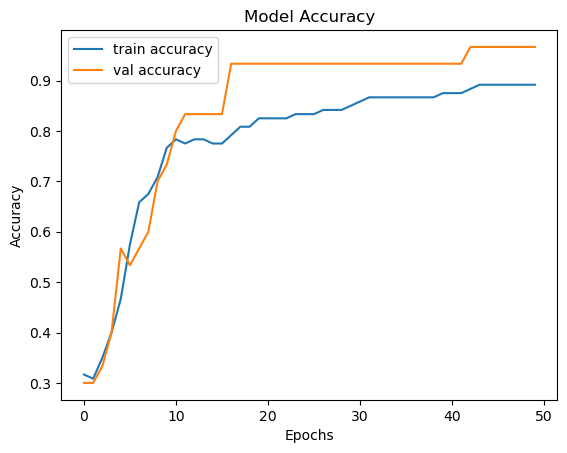

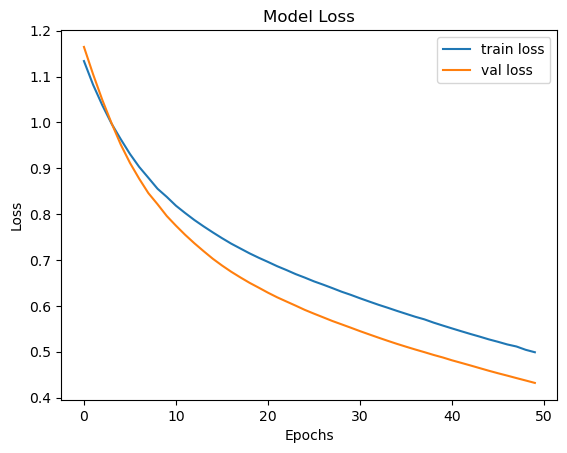

In [39]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [40]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")



1/1 [==============================] - 0s 30ms/step


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report

# Assuming X and y are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()

# Train the models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Predict the labels
log_reg_preds = log_reg.predict(X_test)
knn_preds = knn.predict(X_test)
svm_preds = svm.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)

# Calculate F1 scores
log_reg_f1 = f1_score(y_test, log_reg_preds, average='weighted')
knn_f1 = f1_score(y_test, knn_preds, average='weighted')
svm_f1 = f1_score(y_test, svm_preds, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_preds, average='weighted')

# Print F1 scores
print(f'Logistic Regression F1 Score: {log_reg_f1:.4f}')
print(f'KNN F1 Score: {knn_f1:.4f}')
print(f'SVM F1 Score: {svm_f1:.4f}')
print(f'Decision Tree F1 Score: {decision_tree_f1:.4f}')

# Print detailed classification reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_preds))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_preds))
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_preds))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, decision_tree_preds))


Logistic Regression F1 Score: 1.0000
KNN F1 Score: 1.0000
SVM F1 Score: 1.0000
Decision Tree F1 Score: 1.0000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


SVM Classification Report:
              precision    r